In [ ]:
#imports
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# convert csv file to pandas dataframe
import pandas as pd

#in sample
in_sample = pd.read_csv('monthly_closings_2018_to_2020.csv')

# out of sample and drop rows with all entries equal to NaN
out_sample = pd.read_csv('monthly_closings_2021.csv')
out_sample = out_sample[out_sample['Date'].notna()]

#concat both in_sample and out_sample  for exploration
pandas_data = pd.concat([in_sample, out_sample])
pandas_data = pandas_data.reset_index(drop=True)

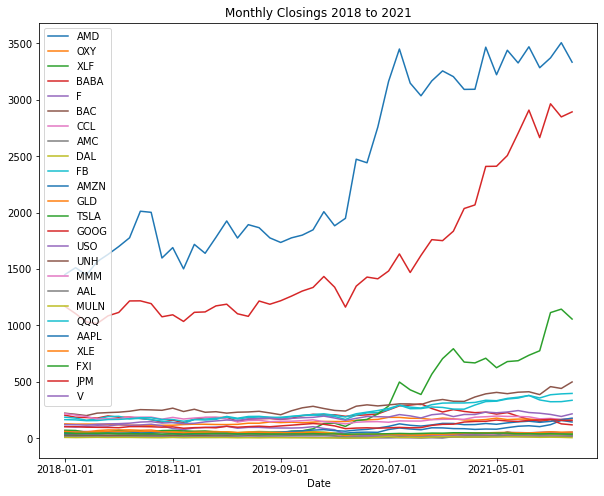

In [ ]:
# Data explotation and Visualization

pandas_data.set_index('Date').plot(figsize=(10,8), title="Monthly Closings 2018 to 2021")

In [ ]:
# store the month-year combination which will have a monthly return (in prepartion of creating the monthly return matrix)
# remove closing for last date available (2021-12-01) because will not have the monthly return for it
# because for Dec 2021, only have the closing price on the first day of Dec 2021, we do not have the closing price of the first day in Jan 2022 or the last day of Dec 2021
date_col=[]
for date_entry in pandas_data.Date[:len(pandas_data)-1]:
  size= len(date_entry)
  date_col.append( date_entry[:size - 3])

In [ ]:
# Calculate monthly return matrix for all

mnth_return = pandas_data.loc[:, pandas_data.columns != 'Date'].pct_change().iloc[1:]
mnth_return.insert(0, 'Year-Month', date_col)
#reindex
mnth_return = mnth_return.reset_index(drop=True)
mnth_return

,Year-Month,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
0,2018-01,-0.118632,-0.124983,-0.029253,-0.088844,-0.021902,0.003125,-0.065633,0.171875,-0.050555,...,-0.044852,-0.059840,-0.001289,-0.203552,-0.012928,0.063848,-0.108350,-0.103474,0.003732,-0.010384
1,2018-02,-0.170107,-0.009756,-0.045030,-0.013968,0.044298,-0.065732,-0.013497,-0.063333,0.022751,...,-0.053767,-0.062399,-0.040370,0.193825,-0.042342,-0.054210,0.010039,0.000424,-0.047879,-0.025311
2,2018-03,0.082587,0.203563,-0.000728,-0.027242,0.014440,0.001409,-0.038426,0.258175,-0.047254,...,0.108330,-0.114477,-0.173788,0.139368,0.006689,-0.015020,0.102737,-0.006562,-0.010821,0.060692
3,2018-04,0.261949,0.089827,-0.009836,0.109051,0.041367,-0.029412,-0.012369,-0.151862,0.035044,...,0.021616,0.014610,0.014209,-0.153846,0.056729,0.130763,0.029942,-0.004901,-0.011283,0.030265
4,2018-05,0.091770,-0.006176,-0.021707,-0.063027,-0.041558,-0.025304,-0.072632,0.074324,-0.077993,...,0.015858,0.004236,-0.126119,0.095380,0.009290,-0.005599,-0.001052,-0.079871,-0.026259,0.014863
5,2018-06,0.222815,0.011998,0.055701,0.009163,-0.093044,0.095424,0.033677,0.039346,0.098506,...,0.035770,0.079300,0.041623,-0.027211,0.030164,0.027983,0.022398,0.028582,0.103167,0.032390
6,2018-07,0.373159,-0.048374,0.013596,-0.065267,-0.042503,0.001619,0.037981,0.168711,0.081932,...,0.060185,-0.006594,0.023773,-0.131469,0.057807,0.196227,-0.034751,-0.028198,0.002198,0.074228
7,2018-08,0.227255,0.028797,-0.026474,-0.058568,-0.024262,-0.047527,0.045529,0.076116,-0.011115,...,-0.009014,0.005700,0.023662,-0.132045,-0.004608,-0.004825,0.017464,0.010144,-0.015186,0.023321
8,2018-09,-0.410489,-0.175474,-0.042908,-0.136441,0.032432,-0.062018,-0.121217,0.023424,-0.053605,...,-0.014314,-0.097053,-0.151222,-0.152134,-0.084312,-0.030478,-0.107185,-0.082438,-0.033853,-0.081551
9,2018-10,0.169687,0.047711,0.026256,0.130588,0.003041,0.032727,0.075839,-0.291277,0.109264,...,0.076564,0.092820,0.144812,0.560175,-0.002650,-0.184045,-0.015634,0.069483,0.027047,0.028002


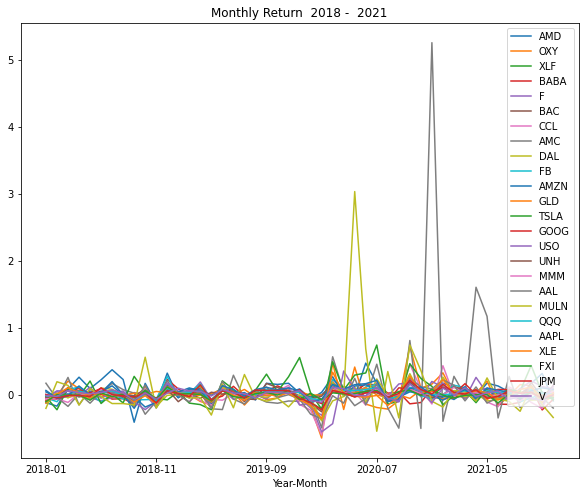

In [ ]:
#Data Exploration
mnth_return.set_index('Year-Month').plot(figsize=(10,8), title="Monthly Return  2018 -  2021")

In [ ]:
# monthly return matrix for in sample
#drop the date column

in_sample_mnth_return=in_sample.loc[:, in_sample.columns != 'Date'].pct_change().iloc[1:]
in_sample_mnth_return

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
1,-0.118632,-0.124983,-0.029253,-0.088844,-0.021902,0.003125,-0.065633,0.171875,-0.050555,-0.045856,...,-0.044852,-0.059840,-0.001289,-0.203552,-0.012928,0.063848,-0.108350,-0.103474,0.003732,-0.010384
2,-0.170107,-0.009756,-0.045030,-0.013968,0.044298,-0.065732,-0.013497,-0.063333,0.022751,-0.103914,...,-0.053767,-0.062399,-0.040370,0.193825,-0.042342,-0.054210,0.010039,0.000424,-0.047879,-0.025311
3,0.082587,0.203563,-0.000728,-0.027242,0.014440,0.001409,-0.038426,0.258175,-0.047254,0.076413,...,0.108330,-0.114477,-0.173788,0.139368,0.006689,-0.015020,0.102737,-0.006562,-0.010821,0.060692
4,0.261949,0.089827,-0.009836,0.109051,0.041367,-0.029412,-0.012369,-0.151862,0.035044,0.115000,...,0.021616,0.014610,0.014209,-0.153846,0.056729,0.130763,0.029942,-0.004901,-0.011283,0.030265
5,0.091770,-0.006176,-0.021707,-0.063027,-0.041558,-0.025304,-0.072632,0.074324,-0.077993,0.013244,...,0.015858,0.004236,-0.126119,0.095380,0.009290,-0.005599,-0.001052,-0.079871,-0.026259,0.014863
6,0.222815,0.011998,0.055701,0.009163,-0.093044,0.095424,0.033677,0.039346,0.098506,-0.111877,...,0.035770,0.079300,0.041623,-0.027211,0.030164,0.027983,0.022398,0.028582,0.103167,0.032390
7,0.373159,-0.048374,0.013596,-0.065267,-0.042503,0.001619,0.037981,0.168711,0.081932,0.018252,...,0.060185,-0.006594,0.023773,-0.131469,0.057807,0.196227,-0.034751,-0.028198,0.002198,0.074228
8,0.227255,0.028797,-0.026474,-0.058568,-0.024262,-0.047527,0.045529,0.076116,-0.011115,-0.064132,...,-0.009014,0.005700,0.023662,-0.132045,-0.004608,-0.004825,0.017464,0.010144,-0.015186,0.023321
9,-0.410489,-0.175474,-0.042908,-0.136441,0.032432,-0.062018,-0.121217,0.023424,-0.053605,-0.077040,...,-0.014314,-0.097053,-0.151222,-0.152134,-0.084312,-0.030478,-0.107185,-0.082438,-0.033853,-0.081551
10,0.169687,0.047711,0.026256,0.130588,0.003041,0.032727,0.075839,-0.291277,0.109264,-0.073654,...,0.076564,0.092820,0.144812,0.560175,-0.002650,-0.184045,-0.015634,0.069483,0.027047,0.028002


In [ ]:
# monthly return matrix for out of sample and drop the date column
out_sample_mnth_return= mnth_return[mnth_return['Year-Month']>='2021-01'].iloc[:,1:]
out_sample_mnth_return = out_sample_mnth_return.reset_index(drop=True)
out_sample_mnth_return

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
0,-0.013195,0.326520,0.116062,-0.063310,0.111111,0.170658,0.432780,-0.395928,0.262908,-0.002748,...,-0.004077,-0.003416,0.219569,-0.183479,-0.001335,-0.081085,0.224568,-0.005875,0.152016,0.099043
1,-0.071116,0.000376,0.053853,-0.046391,0.047009,0.114664,-0.007850,0.274657,0.007092,0.143273,...,0.119951,0.109721,0.141356,0.062257,0.015885,0.008845,0.018899,-0.049113,0.034382,-0.001560
2,0.039745,-0.047013,0.069624,0.018612,-0.057959,0.052761,0.053504,-0.017630,-0.028169,0.103725,...,0.075649,0.023147,-0.091213,0.042125,0.060436,0.076218,0.017408,-0.008144,0.010379,0.103103
3,-0.018868,0.023659,0.047711,-0.073566,0.259099,0.045892,0.057225,1.604188,0.016198,0.011228,...,0.032899,0.029928,0.116022,-0.092267,-0.012012,-0.052107,0.057097,-0.000864,0.074100,-0.026802
4,0.172952,0.204546,-0.034220,0.059918,0.022712,-0.027365,-0.108254,1.169985,-0.092701,0.057737,...,-0.027869,-0.014521,-0.125000,0.250726,0.061390,0.100976,0.031795,0.001946,-0.052971,0.030179
5,0.130523,-0.165048,-0.000690,-0.139298,-0.061238,-0.065693,-0.178680,-0.346860,-0.077670,0.024704,...,0.033188,-0.003474,-0.039132,-0.059598,0.029803,0.064982,-0.073793,-0.122096,-0.024174,0.053759
6,0.042659,-0.015709,0.051479,-0.144475,-0.065950,0.088373,0.115012,0.273096,0.013534,0.064777,...,0.009825,-0.016166,-0.021590,-0.099588,0.042187,0.040930,-0.020045,0.009867,0.059901,-0.070173
7,-0.070629,0.151421,-0.022656,-0.113420,0.086723,0.016766,0.036040,-0.192446,0.053660,-0.105409,...,-0.061330,-0.092333,0.029087,-0.246801,-0.057876,-0.066640,0.076240,-0.049096,0.023382,-0.026392
8,0.168416,0.133991,0.077386,0.114083,0.206215,0.131327,-0.113954,-0.070678,-0.081671,-0.046613,...,0.182593,0.018584,-0.064327,0.127427,0.079836,0.058657,0.116687,0.035962,0.037876,-0.049293
9,0.317225,-0.115717,-0.057129,-0.226810,0.123536,-0.069276,-0.204874,-0.040430,-0.074879,0.002751,...,-0.035290,-0.048355,-0.078646,-0.147470,0.019968,0.103471,-0.050113,-0.053062,-0.059467,-0.084998


COVARIANCE MATRIX AND MEANS OF PERCENT CHANGE MATRIX FOR INSAMPLE AND OUT SAMPLE DATA

In [ ]:
# calculate covariance matrix on the monthly returns for in sample date
Q=in_sample_mnth_return.cov().to_numpy()

# calulcate the vector of expected returns
mu = np.array(np.mean(in_sample_mnth_return, axis = 0))

#determine number of stocks
n= in_sample_mnth_return.shape[1]

In [ ]:
# calculate covariance matrix on the monthly returns for out of sample date
Q_out_sample=out_sample_mnth_return.cov().to_numpy()

# calulcate the vector of expected returns
mu_out_sample = out_sample_mnth_return.mean(axis=0)

#determine number of stocks
n_out_sample= out_sample_mnth_return.shape[1]

In [ ]:
#Minimum Variance Portfolio on in sample data

w_min_var = cp.Variable(n)
prob_min_var = cp.Problem(cp.Minimize(cp.quad_form(w_min_var, Q)), [sum(w_min_var) == 1, w_min_var >= 0])
prob_min_var.solve(verbose=True)

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 25, constraints m = 26
          nnz(P) + nnz(A) = 375
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1   0.0000e+00   1.00e+00   1.00e+02   1.00e-01   1.99e-04s
 150   9.2789e-04   6.49e-07   1.69e-07   4.23e-02   6.56e-04s
plsh   9.2789e-04   4.54e-19   1.07e-16   -----

0.0009278939303461065

In [ ]:
w_minVar = w_min_var.value
var_minVar = np.dot(w_minVar, np.dot(Q, w_minVar))
ret_minVar = np.dot(mu, w_minVar)

# Print results
print("Minimum variance portfolio:\n")
print("Minimum Variance Portfolio Solution status: ", prob_min_var.status)
print("Minimum Variance Portfolio Solution optimal value: ", prob_min_var.value)
print("Variance =", var_minVar)
print("Expected return =", ret_minVar)
print("Standard deviation =", np.sqrt(var_minVar))
print("")
print("Minimum Variance Portfolio Solution weights: ")
print(w_min_var.value)

Minimum variance portfolio:

Minimum Variance Portfolio Solution status:  optimal
Minimum Variance Portfolio Solution optimal value:  0.0009278939303461065
Variance = 0.0009278939303461066
Expected return = 0.008653285914910979
Standard deviation = 0.030461351420219468

Minimum Variance Portfolio Solution weights: 
[ 2.34711076e-19  5.74341943e-20  8.04974643e-21  8.47497298e-20
  1.98801020e-20  1.09424374e-20  2.73065413e-20  2.72299411e-19
  5.54485957e-02  1.08374508e-19  8.96592846e-20  6.59194971e-01
 -6.72526425e-20  2.57096580e-20  1.76013193e-03  8.87191244e-02
  5.48842212e-02 -5.82451239e-20 -4.53773627e-19  3.42087380e-20
 -3.00374544e-20  8.76648789e-20  9.01180838e-02 -1.21197912e-21
  4.98748717e-02]


In [ ]:
# Check constraint as shown in lecture, if True then constraint fullfilled
np.allclose(np.sum(w_min_var.value),1)

True

In [ ]:
#Maximum Variance Portfolio
w_max_var = cp.Variable(n)
prob_max_var = cp.Problem(cp.Maximize(mu.T@w_max_var),
                 [sum(w_max_var) == 1,
                  w_max_var >= 0])
prob_max_var.solve(verbose=True)

0.1021163469313111

In [ ]:
w_maxVar = w_max_var.value
var_maxVar = np.dot(w_maxVar, np.dot(Q, w_maxVar))
ret_maxVar = np.dot(mu, w_maxVar)

# Print results
print("Maximum variance portfolio:\n")
print("Maximum Variance Portfolio Solution status: ", prob_max_var.status)
print("Maximum Variance Portfolio Solution optimal value: ", prob_max_var.value)
print("Variance =", var_maxVar)
print("Expected return =", ret_maxVar)
print("Standard deviation =", np.sqrt(var_maxVar))
print("")
print("Maximum Variance Portfolio Solution weights: ")
print(w_max_var.value)

Maximum variance portfolio:

Maximum Variance Portfolio Solution status:  optimal
Maximum Variance Portfolio Solution optimal value:  0.1021163469313111
Variance = 0.3397485196506799
Expected return = 0.10211634693131112
Standard deviation = 0.582879506974366

Maximum Variance Portfolio Solution weights: 
[4.00446549e-11 2.33109317e-11 2.11897368e-11 2.02514107e-11
 2.13526338e-11 2.10766681e-11 2.36702200e-11 2.30281295e-11
 2.20156300e-11 1.84127151e-11 1.42266925e-11 1.97676588e-11
 1.08469522e-09 1.88147929e-11 2.37055006e-11 1.85314364e-11
 2.26815434e-11 2.41212013e-11 9.99999998e-01 1.68558540e-11
 8.78989931e-12 2.30303345e-11 2.19747289e-11 2.02437383e-11
 1.72961027e-11]


In [ ]:
# Check constraint as shown in lecture, if True then constraint fullfilled
np.allclose(np.sum(w_max_var.value),1)

True

In [ ]:
#mean-variance efficient frontier
# Target returns

targetLen = 50
targetRet = np.linspace(ret_minVar,ret_maxVar,targetLen)
targetRet

array([0.00865329, 0.0105607 , 0.0124681 , 0.01437551, 0.01628292,
       0.01819033, 0.02009774, 0.02200515, 0.02391256, 0.02581997,
       0.02772738, 0.02963479, 0.0315422 , 0.03344961, 0.03535702,
       0.03726443, 0.03917184, 0.04107925, 0.04298666, 0.04489406,
       0.04680147, 0.04870888, 0.05061629, 0.0525237 , 0.05443111,
       0.05633852, 0.05824593, 0.06015334, 0.06206075, 0.06396816,
       0.06587557, 0.06778298, 0.06969039, 0.0715978 , 0.07350521,
       0.07541262, 0.07732002, 0.07922743, 0.08113484, 0.08304225,
       0.08494966, 0.08685707, 0.08876448, 0.09067189, 0.0925793 ,
       0.09448671, 0.09639412, 0.09830153, 0.10020894, 0.10211635])

In [ ]:
#mean-variance efficient frontier

# Define optimization problem and compute one portfolio on efficient frontier
w_mean_var = cp.Variable(n)
eps = cp.Parameter()
eps.value = targetRet[0]
prob_mean_var = cp.Problem(cp.Minimize(cp.quad_form(w_mean_var, Q)),
                 [mu.T@w_mean_var >= eps,
                  sum(w_mean_var) == 1,
                  w_mean_var >= 0])
prob_mean_var.solve(verbose=False)

# Print results
print("Mean variance portfolio test on one portfolio:\n")
print("\nSolution status: ", prob_mean_var.status)
print("Solution optimal value: ", prob_mean_var.value)
print("Solution w_mean_var: ")
print(w_mean_var.value)

Mean variance portfolio test on one portfolio:


Solution status:  optimal
Solution optimal value:  0.0009278939303461067
Solution w_mean_var: 
[ 3.27231831e-19 -1.14158479e-20 -8.31044264e-22  1.11997265e-19
  1.90860299e-20  1.70009911e-20 -2.67194251e-20  8.07705709e-20
  5.54485957e-02  8.99771706e-20  9.08772980e-20  6.59194971e-01
  9.71760135e-20  3.48214411e-20  1.76013193e-03  8.87191244e-02
  5.48842212e-02 -8.25234018e-20 -1.26897129e-20  4.97872186e-20
  4.42501729e-20  2.33161871e-20  9.01180838e-02  8.74792459e-21
  4.98748717e-02]


In [ ]:
# Classical Markowitz efficient frontier
w_frontier = []
var_frontier = []
ret_frontier = []

for eps_var in targetRet:
    eps.value = eps_var
    prob_mean_var.solve(solver=cp.ECOS)
    w_frontier.append(w_mean_var.value)
    var_frontier.append(np.dot(w_mean_var.value, np.dot(Q, w_mean_var.value)))
    ret_frontier.append(np.dot(mu, w_mean_var.value))




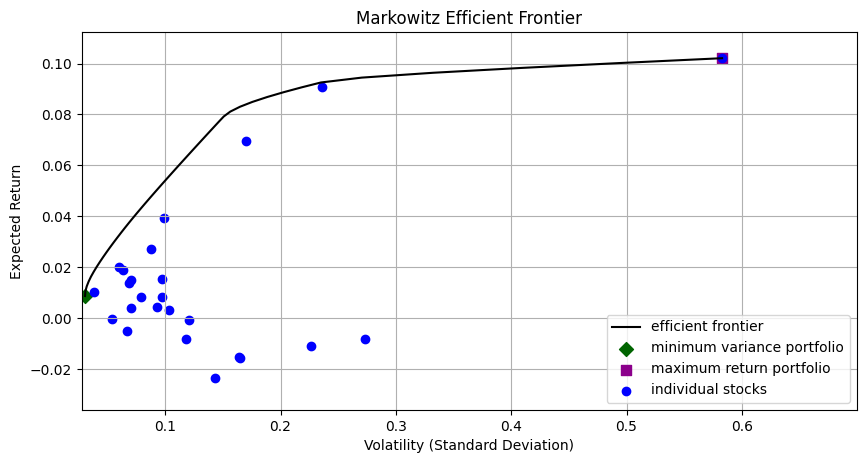

In [ ]:


# plot similar to lecture notes

fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.gca()

# Plot volatility versus expected return for minimum variance portfolio
ax.scatter(x=np.sqrt(var_minVar), y=ret_minVar, marker='D', s=50,  color='DarkGreen', label='minimum variance portfolio')

# Plot volatility versus expected return for maximum return portfolio
ax.scatter(x=np.sqrt(var_maxVar), y=ret_maxVar,  marker='s', s=50, color='DarkMagenta', label='maximum return portfolio')

# Plot efficient frontier
ax.plot(np.sqrt(var_frontier), ret_frontier, 'k-', label='efficient frontier')

# Plot volatility versus expected return for individual stocks
ax.scatter(x=np.sqrt(np.diag(Q)), y=mu, color='Blue', label='individual stocks')

# Format and display the final plot
ax.axis([0.9*np.sqrt(var_minVar), 1.2*np.max(np.sqrt(np.diag(Q))), np.min(mu)-0.1*(np.max(mu)-np.min(mu)), 1.1*ret_maxVar])
ax.set_xlabel('Volatility (Standard Deviation)')
ax.set_ylabel('Expected Return')
plt.title('Markowitz Efficient Frontier')
ax.legend(loc="lower right")
ax.grid()
plt.show()

In [ ]:
# Resampled Efficienct Frontier

from sklearn.utils import resample

#using random seed to have consistent results
np.random.seed(10)


sample_size = in_sample_mnth_return.shape[0]

#determine number of simulated steps
resample_num=200

var_front_re_all=[]
ret_front_re_all=[]

var_minVar_resample_all=[]
var_maxRet_resample_all=[]
ret_minVar_resample_all=[]
ret_maxRet_resample_all=[]
w_front_re_all=[]
Q_resample_all = []
mu_resample_all =[]

# resample
for i in range(resample_num):

    #resample by drawing from the multivariate normal distribution with mu and Q
    mnth_return_resample = np.random.multivariate_normal(mu, Q, sample_size)

    #Calculate the new mean vector (mu_resample) and new variance-covariance matrix (Q _resample)
    #resampled mu and Q
    Q_resample = np.cov(mnth_return_resample.T)
    mu_resample = np.array(np.mean(mnth_return_resample, axis = 0))


    #Compute minimum variance

    #Minimum Variance Portfolio

    w_min_var_resample = cp.Variable(n)
    prob_min_var_resample = cp.Problem(cp.Minimize(cp.quad_form(w_min_var_resample, Q_resample)), [sum(w_min_var_resample) == 1, w_min_var_resample >= 0])
    prob_min_var_resample.solve(verbose=False)

    w_minVar_resample = w_min_var_resample.value #solution value: minimum variance
    var_minVar_resample = np.dot(w_minVar_resample, np.dot(Q_resample, w_minVar_resample)) #variance
    ret_minVar_resample = np.dot(mu_resample, w_minVar_resample) #expected return

    #compute maximum expected return

    #Maximum Variance Portfolio
    w_max_var_resample = cp.Variable(n)
    prob_max_var_resample = cp.Problem(cp.Maximize(mu_resample.T@w_max_var_resample),
                    [sum(w_max_var_resample) == 1,
                      w_max_var_resample >= 0])
    prob_max_var_resample.solve(verbose=False)

    w_maxRet_resample = w_max_var_resample.value #solution value: maximum expected return
    var_maxRet_resample = np.dot(w_maxRet_resample, np.dot(Q_resample, w_maxRet_resample)) #variance
    ret_maxRet_resample = np.dot(mu_resample, w_maxRet_resample) #expected return

    #target return
    targetRet_resample = np.linspace(ret_minVar_resample,ret_maxRet_resample,targetLen)

    # Define optimization problem and compute one portfolio on efficient frontier
    w_re = cp.Variable(n)
    eps_re = cp.Parameter()

    constraints_resample = [mu_resample.T@w_re >= eps_re,sum(w_re) == 1,w_re >= 0]
    prob_resample = cp.Problem(cp.Minimize(cp.quad_form(w_re, Q_resample)), constraints_resample)

    # Compute efficient frontier
    w_front_re = []
    var_front_re = []
    ret_front_re = []
    for epsilon in targetRet_resample:
      eps_re.value = epsilon
      prob_resample.solve(solver=cp.ECOS)
      w_front_re.append(w_re.value)

      var_front_re.append(np.dot(w_re.value, np.dot(Q_resample, w_re.value)))
      ret_front_re.append(np.dot(mu_resample, w_re.value))

    #Store results for each resampling

    w_front_re_all.append(w_front_re)
    var_front_re_all.append(var_front_re)
    ret_front_re_all.append(ret_front_re)
    var_minVar_resample_all.append(var_minVar_resample)
    var_maxRet_resample_all.append(var_maxRet_resample)
    ret_minVar_resample_all.append(ret_minVar_resample)
    ret_maxRet_resample_all.append(ret_maxRet_resample)
    Q_resample_all.append(Q_resample)
    mu_resample_all.append(mu_resample)



#compute the average weights at each return leve
avg_var_front_re= np.mean((np.array(var_front_re_all)),axis=0)
avg_ret_front_re= np.mean((np.array(ret_front_re_all)),axis=0)
avg_var_minVar_resample=np.mean((np.array(var_minVar_resample_all)),axis=0)
avg_var_maxRet_resample=np.mean((np.array(var_maxRet_resample_all)),axis=0)
avg_ret_minVar_resample=np.mean((np.array(ret_minVar_resample_all)),axis=0)
avg_ret_maxRet_resample=np.mean((np.array(ret_maxRet_resample_all)),axis=0)
avg_w_front_re_all=np.mean((np.array(w_front_re_all)),axis=0)





In [ ]:
#compute the resampled efficient frontier based on the average weights and orignial mu & Q

var_resample_front=[]
ret_resample_front=[]
for i in range(targetLen):

  var_resample_front.append(np.dot(avg_w_front_re_all[i], np.dot(Q, avg_w_front_re_all[i]))) #variance
  ret_resample_front.append(np.dot(mu, avg_w_front_re_all[i])) #expected return

In [ ]:
#Sharpe's Ratio

#0.2% is risk free rate monthly
riskFreeRate = 0.002

In [ ]:
#Determine weights of minimum variance and maximum return along the classical efficient frontier

#Min variance
orig_weights_minVar = w_frontier[0]
print("MIN VARIANCE WEIGHTS FOR CLASSICAL FRONTIER")
print(orig_weights_minVar)
print()

#Max return
orig_weights_maxRet = w_frontier[targetLen - 1]
print("MAX RETURN WEIGHTS FOR CLASSICAL FRONTIER")
print(orig_weights_maxRet)

MIN VARIANCE WEIGHTS FOR CLASSICAL FRONTIER
[9.19388715e-10 7.98596806e-10 5.33432321e-09 2.65552535e-09
 3.87662260e-09 2.20242379e-09 1.19191757e-09 4.96915577e-08
 5.54478573e-02 1.65103354e-09 3.24544166e-09 6.59193405e-01
 4.49038438e-10 3.99736885e-08 1.75751673e-03 8.87202244e-02
 5.48739125e-02 1.28140220e-09 3.34473594e-10 5.30527469e-09
 2.25312265e-09 1.31206179e-09 9.01197561e-02 1.65996399e-08
 4.98871887e-02]

MAX RETURN WEIGHTS FOR CLASSICAL FRONTIER
[ 6.81567227e-10 -1.30552150e-10  2.60155441e-11  5.15702202e-11
  1.13132336e-11  2.78180536e-11 -8.91874270e-11 -2.43897616e-11
 -1.28977046e-11  9.74345039e-11  1.54777847e-10  6.60375470e-11
  6.18012852e-09  9.25455050e-11 -8.86702237e-11  9.70683859e-11
 -1.99279914e-11 -1.47040685e-10  9.99999992e-01  1.17938138e-10
  2.54005102e-10 -4.38498036e-11  4.82807725e-12  5.38315751e-11
  1.17585645e-10]


In [ ]:
#Compute sharp ratio using the classical Markowitz efficient frontier
ret_array_clas = np.array(ret_frontier)
var_array_clas = np.array(var_frontier)

sharpe_array_clas = (ret_array_clas - riskFreeRate)/np.sqrt(var_array_clas)

weights_sharpe_clas = w_frontier[sharpe_array_clas.argmax()]
print(sharpe_array_clas)
print(sharpe_array_clas.argmax())

print()
print("Sharpe Ratio Portfolio Weights on Classical Efficient Frontier")
print(weights_sharpe_clas)

[0.21842804 0.27800793 0.32774794 0.36827174 0.4008275  0.42613411
 0.44630935 0.46246746 0.47543186 0.48587105 0.49430315 0.50103627
 0.5064046  0.51069581 0.51411326 0.51665943 0.51848227 0.5197395
 0.52055446 0.52102369 0.52122284 0.52121134 0.52103597 0.52073366
 0.52033363 0.51985904 0.5193283  0.51875604 0.51815392 0.51753126
 0.51689544 0.51625237 0.51560673 0.51496224 0.51432182 0.51368778
 0.5130289  0.51215006 0.50586457 0.49160956 0.47226911 0.45041653
 0.42794104 0.40604084 0.38537692 0.3420309  0.28395628 0.23536734
 0.19889106 0.17176165]
20

Sharpe Ratio Portfolio Weights on Classical Efficient Frontier
[3.03162186e-01 1.08841608e-10 4.39715261e-10 5.07927200e-10
 5.21909744e-10 3.43368767e-10 1.34963407e-10 1.18413864e-10
 3.33456323e-10 4.51147689e-10 1.00573340e-09 4.07731936e-01
 1.68211296e-01 9.56265600e-10 2.13670662e-10 1.44320708e-09
 3.46554414e-10 1.21221428e-10 2.27437411e-02 1.14027129e-09
 9.81508297e-02 1.90918394e-10 5.05440585e-10 6.86910235e-10
 2.38302

In [ ]:
#Determine weights of minimum variance and maximum return along the resampled efficient frontier

#Min variance
weights_minRet_re = avg_w_front_re_all[0]
print("MIN VARIANCE WEIGHTS FOR RESAMPLED FRONTIER")
print(weights_minRet_re)
print()

#Max return
weights_maxRet_re = avg_w_front_re_all[targetLen - 1]
print("MAX RETURN WEIGHTS FOR RESAMPLED FRONTIER")
print(weights_maxRet_re)

MIN VARIANCE WEIGHTS FOR RESAMPLED FRONTIER
[1.14356445e-09 8.40289579e-05 3.99203809e-09 3.01669200e-03
 5.78536788e-03 1.75208210e-09 1.07165063e-09 7.10314015e-03
 3.82852519e-02 1.54983098e-09 4.15319392e-03 6.26866130e-01
 4.80699298e-10 2.30295137e-02 1.09156434e-02 9.02539928e-02
 6.29358404e-02 1.40139827e-04 4.71899795e-04 4.09167370e-09
 1.91536937e-03 1.10237423e-09 7.27061921e-02 1.30190545e-02
 3.93185342e-02]

MAX RETURN WEIGHTS FOR RESAMPLED FRONTIER
[1.54999996e-01 1.06136355e-10 1.43714664e-10 1.52732025e-10
 1.38496983e-10 1.43633650e-10 1.06475506e-10 5.00000010e-03
 1.26304197e-10 1.70026787e-10 1.94481425e-10 1.63520549e-10
 3.99999990e-01 1.70274285e-10 1.20801737e-10 1.78048403e-10
 1.30043023e-10 8.97468498e-11 4.35000010e-01 1.76561980e-10
 5.00000024e-03 1.23756672e-10 1.39021355e-10 1.54968391e-10
 1.76064932e-10]


In [ ]:
#Compute sharp ratio using the Resampled efficient frontier
ret_array_clas_re = np.array(ret_resample_front)
var_array_clas_re = np.array(var_resample_front)

sharpe_array_clas_re = (ret_array_clas_re - riskFreeRate)/np.sqrt(var_array_clas_re)

weights_sharpe_clas_re = avg_w_front_re_all[sharpe_array_clas_re.argmax()]
print(sharpe_array_clas_re)
print(sharpe_array_clas_re.argmax())

print()
print("Sharpe Ratio Portfolio Weights on Resampled Efficient Frontier")

print(weights_sharpe_clas_re)

[0.21353382 0.2552298  0.29155841 0.32427552 0.35305609 0.37818105
 0.39921299 0.41660732 0.4308419  0.4423174  0.45130428 0.45828306
 0.46384802 0.46818037 0.47168537 0.4746668  0.4773627  0.47967243
 0.48157902 0.48323018 0.48467905 0.48588872 0.48677252 0.48721753
 0.48747068 0.48750917 0.48671513 0.48550912 0.48393549 0.48184026
 0.47921569 0.47578626 0.4715565  0.466947   0.46210727 0.45614826
 0.44980102 0.4429936  0.43546854 0.427281   0.41822511 0.40821239
 0.39711761 0.38580495 0.37360291 0.36066815 0.34736162 0.33394143
 0.3196458  0.30663118]
25

Sharpe Ratio Portfolio Weights on Resampled Efficient Frontier
[2.83876490e-01 3.64302939e-04 1.61926242e-10 1.45304827e-02
 7.20549683e-03 1.37230147e-10 5.70164619e-11 5.36771118e-04
 1.35558273e-03 7.49115458e-03 1.07882052e-02 1.21341396e-01
 2.22050289e-01 1.62823127e-02 1.21002193e-03 6.61032779e-02
 2.49897184e-03 4.76545136e-11 6.90049337e-02 3.13559576e-10
 1.16579306e-01 8.94133797e-11 3.26894164e-10 1.45348214e-02
 4.4246

In [ ]:

#We want return for the whole year so only use first and last month
out_sample_ = out_sample.drop(out_sample.index[1:11])
out_sample_.reset_index(inplace = True, drop = True)

#Compute percent change

ret_2021 = out_sample_.loc[:, out_sample_.columns != 'Date'].pct_change().iloc[1:,:]

ret_2021

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
1,0.68029,0.446726,0.366112,-0.53201,0.982391,0.522067,0.077665,1.051282,0.029505,0.302017,...,0.521509,0.043312,0.04601,-0.584591,0.269255,0.353931,0.458557,-0.256478,0.261573,0.128286


In [ ]:
#From classical frontier find
#Minimum variance portfolio
#orig_weights_minVar
orig_minVar_ret2021 = np.dot(ret_2021, orig_weights_minVar)
print(orig_minVar_ret2021)


#Maximum return portfolio
#orig_weights_maxRet
orig_maxRet_ret2021 = np.dot(ret_2021, orig_weights_maxRet)
print(orig_maxRet_ret2021)

#Sharpe ratio portfolio
#orig_weights_sharpe
orig_sharpe_ret2021 = np.dot(ret_2021, weights_sharpe_clas)
print(orig_sharpe_ret2021)


#Compute returns on $1000

#Compute returns on $1000
print()
print('Out-of-sample returns on $1000 investment for classical frontier: \n')
print('On the Classical Efficient Frontier, the minimum variance portfolio returns $' , orig_minVar_ret2021*1000)
print('On the Classical Efficient Frontier, the maximum return portfolio returns $' , orig_maxRet_ret2021*1000)
print('On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , orig_sharpe_ret2021*1000 , '\n')


[0.02822418]
[-0.58459094]
[0.27958666]

Out-of-sample returns on $1000 investment for classical frontier: 

On the Classical Efficient Frontier, the minimum variance portfolio returns $ [28.22418226]
On the Classical Efficient Frontier, the maximum return portfolio returns $ [-584.59093816]
On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [279.58666296] 



In [ ]:
#From resampled frontier find
#Minimum variance portfolio

#weights_minVar resampled
re_minVar_ret2021 = np.dot(ret_2021, weights_minRet_re)
print(re_minVar_ret2021)


#Maximum return portfolio
#weights_maxRet resampled
re_maxRet_ret2021 = np.dot(ret_2021, weights_maxRet_re)
print(re_maxRet_ret2021)

#Sharpe ratio portfolio
#weights_sharpe resampled
re_sharpe_ret2021 = np.dot(ret_2021, weights_sharpe_clas_re)
print(re_sharpe_ret2021)


#Compute returns on $1000

#Compute returns on $1000

print('Out-of-sample returns on $1000 investment for resampled frontier: \n')
print('On the Resampled Efficient Frontier, the minimum variance portfolio returns $' , re_minVar_ret2021*1000)
print('On the Resampled Efficient Frontier, the maximum return portfolio returns $' , re_maxRet_ret2021*1000)
print('On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , re_sharpe_ret2021*1000)

[0.0661134]
[-0.00912794]
[0.32345488]
Out-of-sample returns on $1000 investment for resampled frontier: 

On the Resampled Efficient Frontier, the minimum variance portfolio returns $ [66.11340289]
On the Resampled Efficient Frontier, the maximum return portfolio returns $ [-9.12793835]
On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [323.45488437]


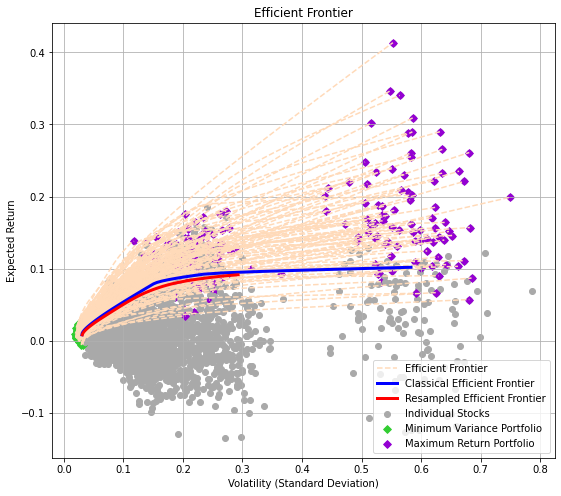

In [ ]:
#Plot Efficient Frontiers

axC = plt.gca()
plt.rcParams['figure.figsize'] = [12, 10]

for i in range(resample_num):
    # Plot volatility versus expected return for individual stocks
    axC.scatter(x=np.sqrt(np.diag(Q_resample_all[i])), y=mu_resample_all[i], color='darkgray', label='Individual Stocks' if i == 0 else "")

    # Plot volatility versus expected return for mimimum variance portfolio
    axC.scatter(x=np.sqrt(var_minVar_resample_all[i]), y=ret_minVar_resample_all[i], marker='D', s=30,  color='limegreen', label='Minimum Variance Portfolio' if i == 0 else "")

    # Plot volatility versus expected return for maximum return portfolio
    axC.scatter(x=np.sqrt(var_maxRet_resample_all[i]), y=ret_maxRet_resample_all[i],  marker='D', s=30, color='darkviolet', label='Maximum Return Portfolio' if i == 0 else "")

    # Plot efficient frontier
    axC.plot(np.sqrt(var_front_re_all[i]), ret_front_re_all[i], '--', color='peachpuff', label='Efficient Frontier' if i == 0 else "")

#Plot the classical mean-variance efficient frontier
axC.plot(np.sqrt(var_frontier), ret_frontier, color='blue', linewidth=3, label='Classical Efficient Frontier')

#Plot the resampled efficient frontier
axC.plot(np.sqrt(var_resample_front), ret_resample_front, color='red', linewidth=3, label='Resampled Efficient Frontier')

axC.set_xlabel('Volatility (Standard Deviation)')
axC.set_ylabel('Expected Return')
plt.title('Efficient Frontier')
axC.legend(loc="lower right")
axC.grid()
plt.show()



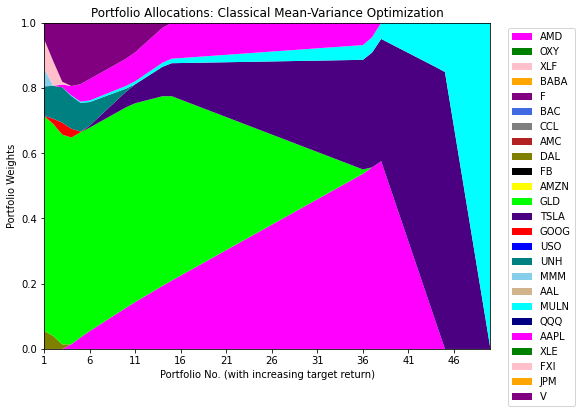

In [ ]:
# plot weight compositions of classical frontier
x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black','yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8, 6))
plt.stackplot(x_tick, np.array(w_frontier).T, colors=color_list)
plt.legend(in_sample.columns[1:], bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Classical Mean-Variance Optimization")
plt.show()

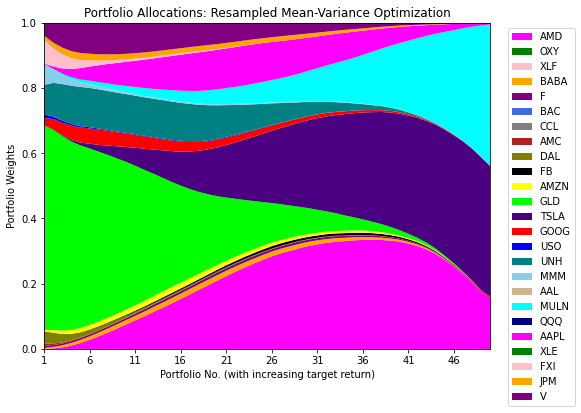

In [ ]:
# plot weight compositions of resampled frontier
x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black','yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8, 6))
plt.stackplot(x_tick, np.array(avg_w_front_re_all).T, colors=color_list)
plt.legend(in_sample.columns[1:], bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Resampled Mean-Variance Optimization")
plt.show()